In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [9]:
#describe for numeric data only
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#describe for categorical data only
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


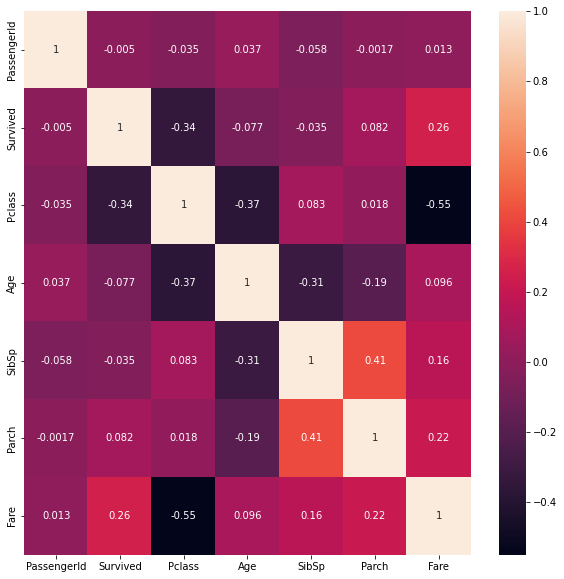

In [11]:
#to see which column depend on survived (parch,fare)
plt_1 = plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True)

In [12]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


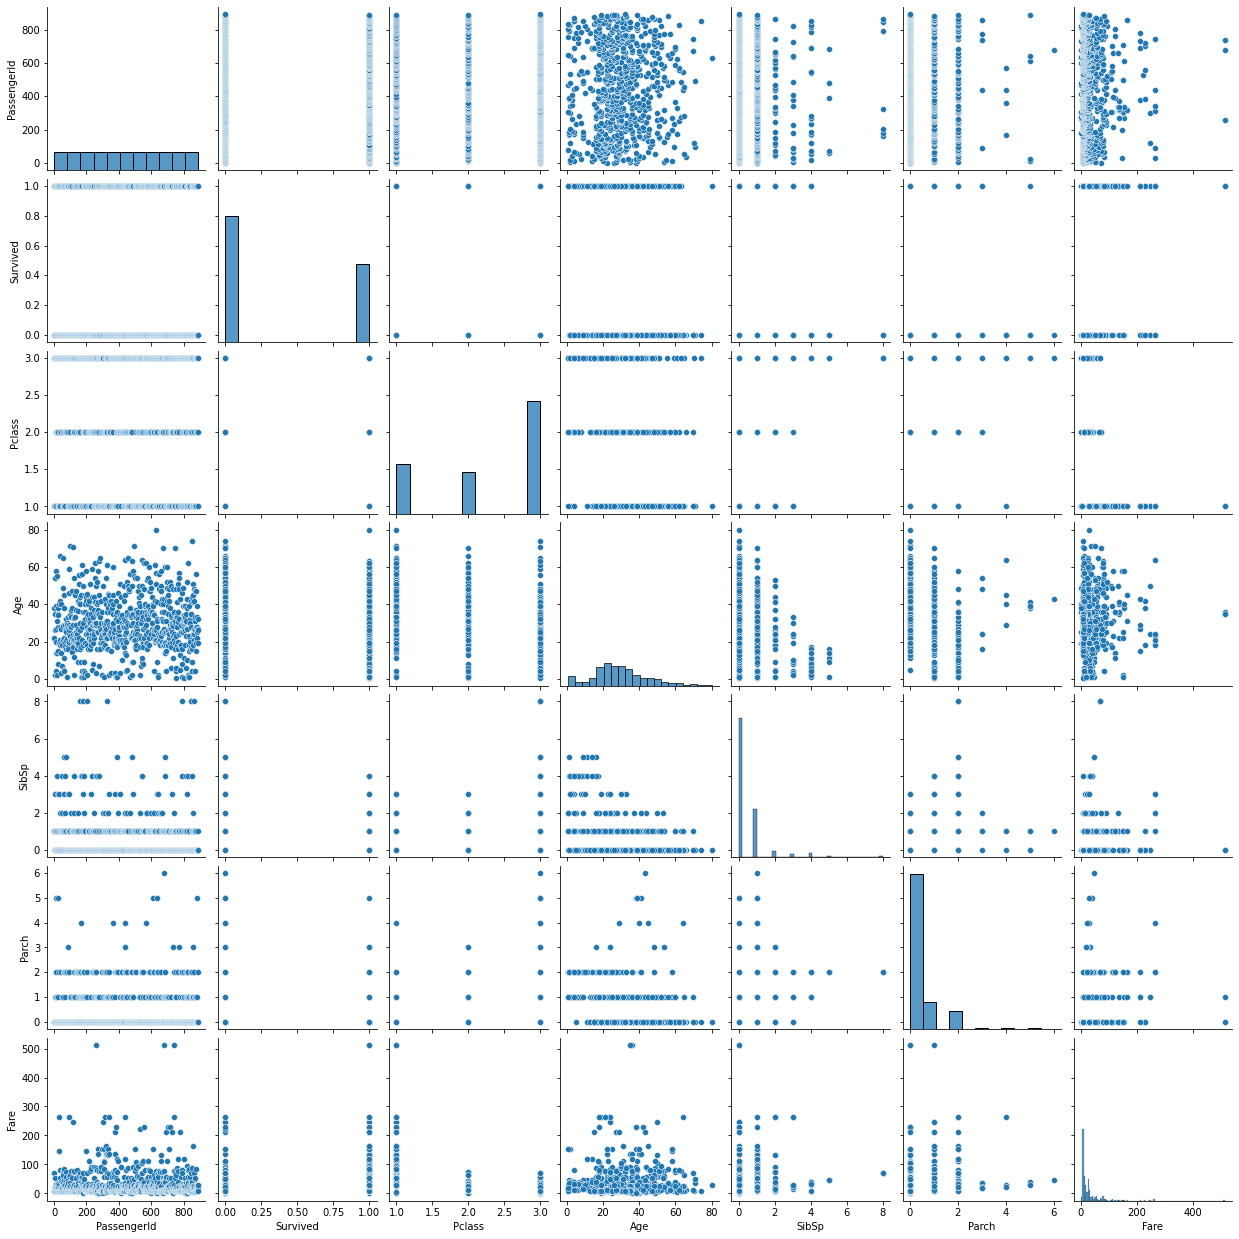

In [16]:
sns.pairplot(train_df)

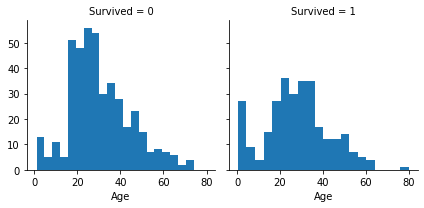

In [17]:
figure = sns.FacetGrid(train_df,col='Survived')
figure.map(plt.hist, 'Age',bins=20)

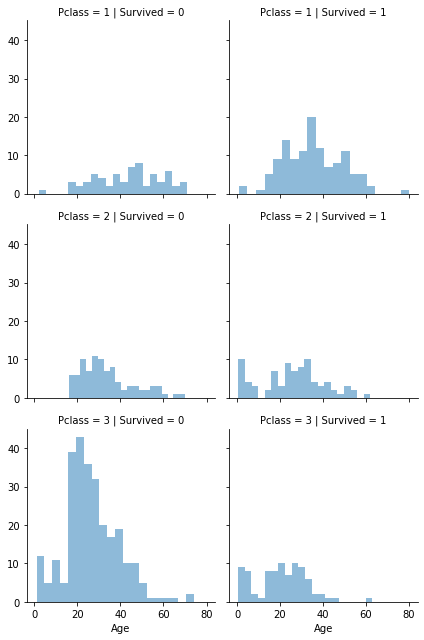

In [18]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass')
#aplha means degree of opcity
grid.map(plt.hist,'Age',alpha=0.5,bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


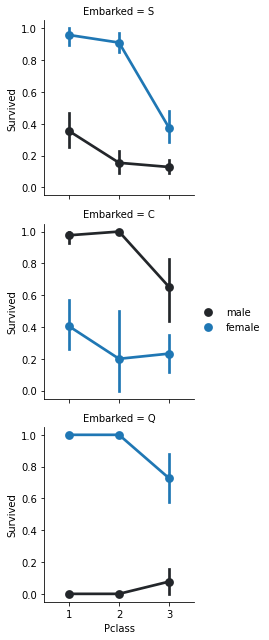

In [19]:
g = sns.FacetGrid(train_df,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


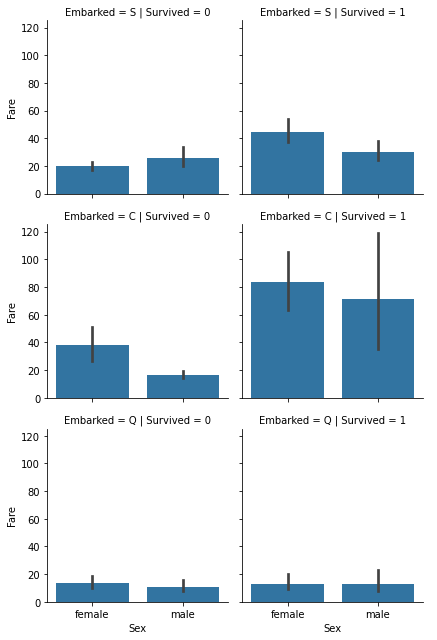

In [20]:
c = sns.FacetGrid(train_df,row='Embarked',col='Survived')
c.map(sns.barplot,'Sex','Fare')
c.add_legend()

In [21]:
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)

In [22]:
combine = [train_df,test_df]

In [23]:
#to know title of people
for ds in combine:
  ds['Title'] = ds.Name.str.extract(' ([A-Za-z]+)\.')
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for ds in combine:
  ds['Title'] = ds['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  ds['Title'] = ds['Title'].replace('Mlle','Miss')
  ds['Title'] = ds['Title'].replace('Ms','Miss')
  ds['Title'] = ds['Title'].replace('Mme','Mrs')
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [25]:
title_mapping = {'Mr': 1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for ds in combine:
  ds['Title'] = ds['Title'].map(title_mapping)
  ds['Title'] = ds['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
#drop name and id
#train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df,test_df]
train_df.shape, test_df.shape

((891, 11), (418, 9))

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for ds in combine:
  ds['Sex'] = labelencoder.fit_transform(ds['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1


In [28]:
ages_guess = np.zeros((2,3))
ages_guess

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
for ds in combine:
  ds['Age'] = ds['Age'].fillna(ds['Age'].mean())
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

In [30]:
train_df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
for ds in combine:
  ds.loc[ds['Age'] <= 16, 'Age'] = 0
  ds.loc[(ds['Age'] > 16) & (ds['Age'] <= 32)] = 1
  ds.loc[(ds['Age'] > 32) & (ds['Age'] <= 48)] = 2
  ds.loc[(ds['Age'] > 48 ) & (ds['Age'] <= 64)] = 3
  ds.loc[ds['Age'] > 64 ] = 4
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,1,1,1,1,1.0,1,1,1.0,1,1
1,2,2,2,2,2,2.0,2,2,2.0,2,2
2,1,1,1,1,1,1.0,1,1,1.0,1,1
3,2,2,2,2,2,2.0,2,2,2.0,2,2
4,2,2,2,2,2,2.0,2,2,2.0,2,2


In [32]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [55]:
for ds in combine:
  ds['Embarked'] = ds['Embarked'].replace('S',5)
  ds['Embarked'] = ds['Embarked'].replace('C',6) 
  ds['Embarked'] = ds['Embarked'].replace('Q',7)
train_df['Embarked'].unique()

array([1, 2, 3, 5, 6, 7, 4])

In [56]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_df,test_df]
train_df.head()

KeyError: ignored

In [57]:
#ML
from sklearn.model_selection import train_test_split
X = train_df.drop(['Survived','PassengerId','Name'],axis=1)
y = train_df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=44)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [158]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred = modelLR.predict(X_test)
from sklearn.metrics import accuracy_score
modelLRScore=accuracy_score(y_test,y_pred)
modelLRScore

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9664804469273743

In [160]:
from sklearn.svm import SVC
modelSVC = SVC()
modelSVC.fit(X_train,y_train)
y_pred = modelSVC.predict(X_test)
modelSVCScore=accuracy_score(y_test,y_pred)
modelSVCScore

0.9441340782122905

In [161]:
from sklearn.neighbors import KNeighborsClassifier
modelKNC = KNeighborsClassifier(n_neighbors=3)
modelKNC.fit(X_train,y_train)
y_pred = modelKNC.predict(X_test)
modelKNCScore=accuracy_score(y_test,y_pred)
modelKNCScore

0.9553072625698324

In [162]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train,y_train)
y_pred = modelGNB.predict(X_test)
modelGNBScore=accuracy_score(y_test,y_pred)
modelGNBScore

0.9441340782122905

In [163]:
from sklearn.linear_model import Perceptron
modelP = Perceptron()
modelP.fit(X_train,y_train)
y_pred = modelP.predict(X_test)
modelPScore=accuracy_score(y_test,y_pred)
modelPScore

0.9162011173184358

In [165]:
from sklearn.svm import LinearSVC
modelLSVC = LinearSVC()
modelLSVC.fit(X_train,y_train)
y_pred = modelLSVC.predict(X_test)
modelLSVCScore=accuracy_score(y_test,y_pred)
modelLSVCScore

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8715083798882681

In [166]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
modelSGD = SGDClassifier()
modelSGD.fit(X_train,y_train)
y_pred = modelSGD.predict(X_test)
modelSGDScore=accuracy_score(y_test,y_pred)
modelSGDScore

0.8212290502793296

In [167]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train,y_train)
y_pred = modelDTC.predict(X_test)
modelDTCScore=accuracy_score(y_test,y_pred)
modelDTCScore

0.9888268156424581

In [168]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier()
modelRFC.fit(X_train,y_train)
y_pred = modelRFC.predict(X_test)
modelRFCScore=accuracy_score(y_test,y_pred)
modelRFCScore

0.9832402234636871

In [170]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine','KNN','Logistic Regression','Random Forest','Naive Bayes','Perceptron','SGD','LSVC','Decision Tree'],
    'Score': [modelSVCScore, modelKNCScore, modelLRScore, modelRFCScore, modelGNBScore, modelPScore, modelSGDScore, modelLSVCScore, modelDTCScore]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
8,Decision Tree,0.988827
3,Random Forest,0.983240
2,Logistic Regression,0.966480
1,KNN,0.955307
0,Support Vector Machine,0.944134
4,Naive Bayes,0.944134
5,Perceptron,0.916201
7,LSVC,0.871508
6,SGD,0.821229
